# Fake News Prediction

* **Introduction:**


In the digital age, the widespread circulation of misinformation and fake news poses a substantial threat to public trust and decision-making. Our project addresses this challenge by developing a Fake News Prediction system, utilizing machine learning to discern between authentic and deceptive news articles.

* **Problem Statement:**

Develop an automated system to mitigate the impact of fake news by accurately identifying deceptive articles, addressing the dynamic nature of online content and intentional efforts to deceive. The system aims to preserve the integrity of information ecosystems, preventing real-world consequences such as public panic, distorted opinions, and potential influence on political events.

* **Aim:**

The primary aim of our project is to design and implement a robust Fake News Prediction system that employs advanced machine learning models. This system will analyze textual content, linguistic patterns, and contextual cues to determine the authenticity of news articles. By leveraging the power of artificial intelligence, the aim is to contribute to the mitigation of fake news dissemination and provide users with a tool to critically evaluate the information they encounter online.

* **Objective:** Build a model to predict whether a given news article is fake or real.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re
from random import randint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

In [159]:
df=pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\Capstone-2\fake_train.csv")

# Exploring the dataset

In [160]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [161]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [162]:
#Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [163]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

Text(0, 0.5, 'Count')

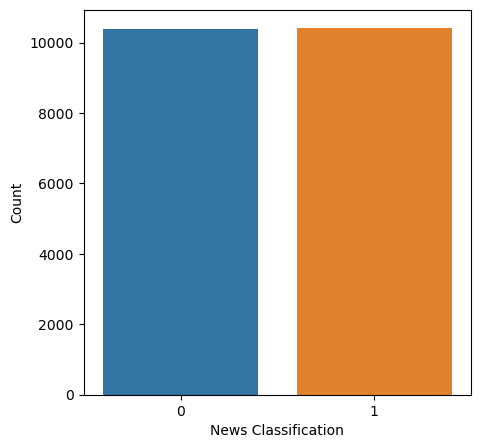

In [164]:

# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(5,5))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

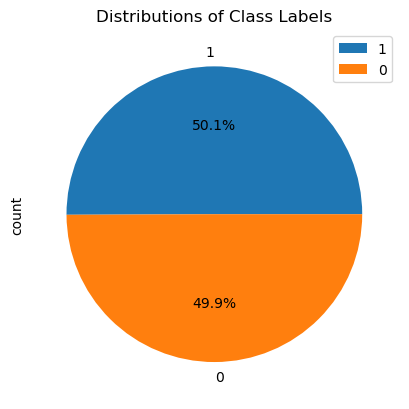

In [8]:
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Distributions of Class Labels")
plt.legend()
plt.show()

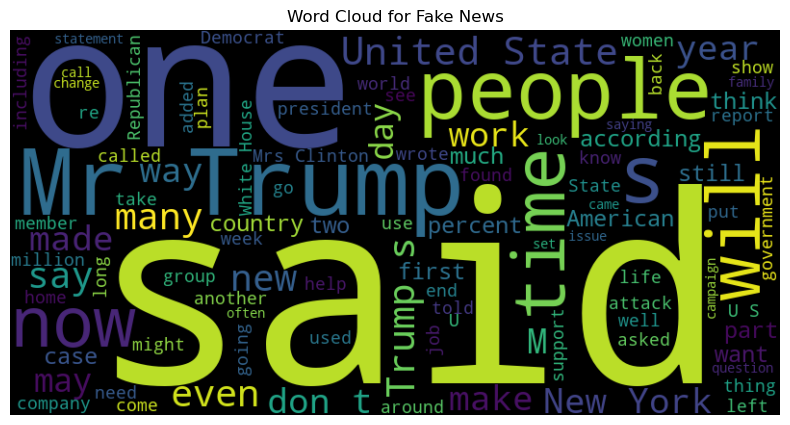

In [113]:
# Visualize word frequency
from wordcloud import WordCloud

fake_text = " ".join(text for text in df[df['label'] == 0]['text'])
wordcloud_fake = WordCloud(width=800, height=400, max_words=100).generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

The image you sent me is a word cloud of text related to fake news. The words in the cloud are all related to the spread of false or misleading information. Some of the most prominent words include "MrthinkTrump," "New York," "said," "president," "country," "work," "United States," "American," and "government."

These words suggest that the fake news in question is related to American politics, possibly involving former President Donald Trump. The word "New York" may be a reference to Trump's home state or to the city where he once served as mayor. The words "said" and "president" suggest that the word cloud is made up of quotes or statements attributed to Trump.

The words "country," "work," "United States," and "American" suggest that the fake news is about Trump's policies or actions as president. The word "government" suggests that the fake news may be critical of the US government in general.

Overall, the image suggests that the word cloud is made up of text related to fake news about American politics, possibly involving former President Donald Trump.

It is important to note that I cannot be sure of the exact meaning of the image without more context. The words in the cloud could be interpreted in many different ways, and the image could be about any number of specific topics. However, I hope this explanation is helpful as a starting point for understanding the image.

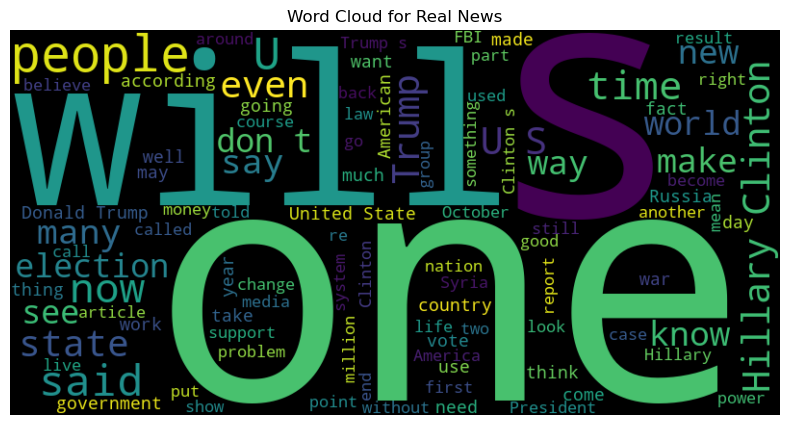

In [112]:
# Visualize word frequency
from wordcloud import WordCloud

fake_text = " ".join(text for text in df[df['label'] == 1]['text'])
wordcloud_fake = WordCloud(width=800, height=400, max_words=100).generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

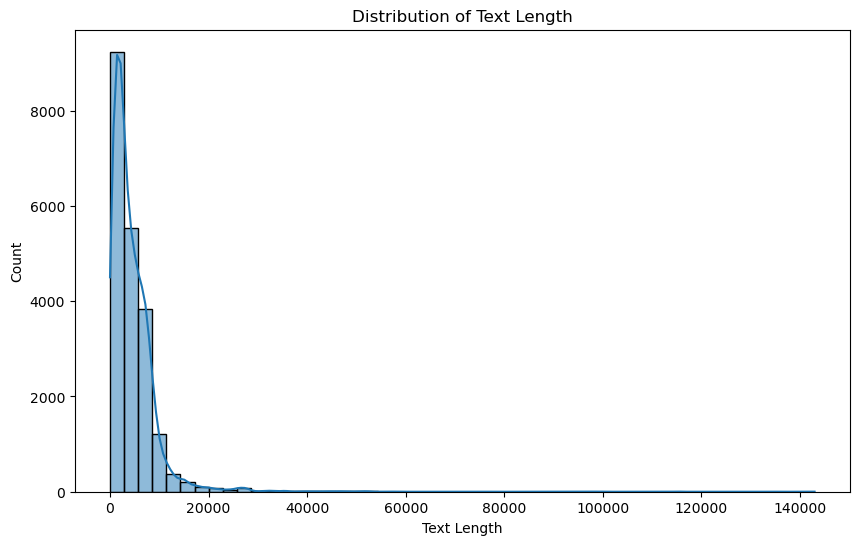

In [121]:
# Distribution of Text Length
df['text_length'] = df['text'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(x='text_length', data=df, bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.show()


Key Features:

Distribution Shape: The graph shows how the text lengths are distributed in the dataset.

Central Tendency: The peak of the distribution indicates the most common text length (around 20,000 words).

Variability: The spread of the distribution shows how much the text lengths vary (ranging from 0 to 120,000 words).

Outliers: No extreme values or unusual patterns suggest outliers.

Slight Right Skew: The distribution is slightly skewed to the right, meaning more texts have shorter lengths.
    
Most texts are around 20,000 words long.

Text lengths vary considerably, ranging from very short to quite long.

There are more texts with shorter lengths than very long lengths.

The graph visually represents the distribution of text lengths in the dataset.
The x-axis shows the text lengths, ranging from 0 to 120,000 words.
The y-axis shows the frequency of texts for each length.
The highest peak occurs around 20,000 words, indicating the most common length.
The distribution is slightly skewed to the right, with a longer tail representing fewer texts with longer lengths.

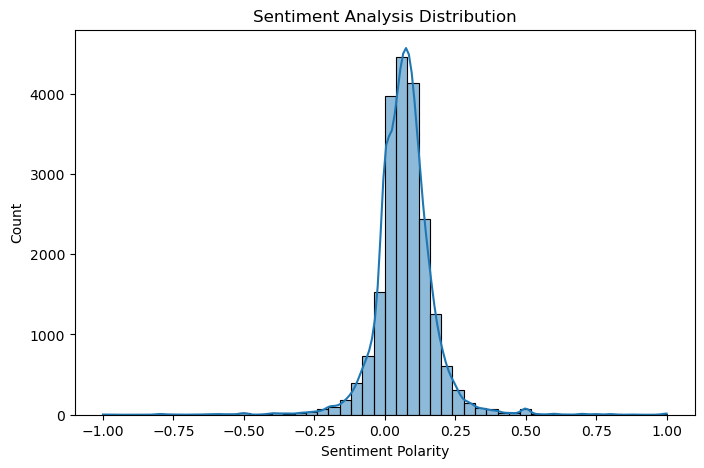

In [13]:
# Sentiment Analysis Distribution
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8, 5))
sns.histplot(x='sentiment', data=df, bins=50, kde=True)
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment Polarity')
plt.show()

* **Symmetrical Distribution:**

The histogram is roughly symmetrical, indicating an equal distribution of positive and negative sentiment documents. This suggests a balance between positive and negative sentiments in the dataset.

Peak around Neutral Sentiment:

There is a noticeable peak around a sentiment polarity score of 0, implying a significant number of documents with neutral sentiment. This could indicate a substantial amount of content expressing neither positive nor negative emotions.

* **Normal Distribution Shape:**

The shape of the histogram resembles a normal distribution, implying that most documents have sentiment polarity scores close to the mean. Fewer documents exhibit extreme sentiment polarity scores, contributing to the bell-shaped curve.

* **Mix of Sentiments:**

The dataset contains a mix of positive, negative, and neutral documents, reflecting a diverse range of sentiments. The symmetrical distribution suggests a comparable prevalence of positive and negative sentiments overall.

* **Considerations for Interpretation:**

The size of the dataset and the sentiment analysis algorithm employed influence the histogram's shape. Larger datasets tend to produce smoother histograms, and different algorithms may yield varied results.

In summary, the sentiment analysis distribution provides a nuanced understanding of sentiment polarity across documents, highlighting a balance between positive and negative sentiments with a notable presence of neutral sentiments. The symmetrical, bell-shaped curve suggests a normal distribution pattern within the dataset.

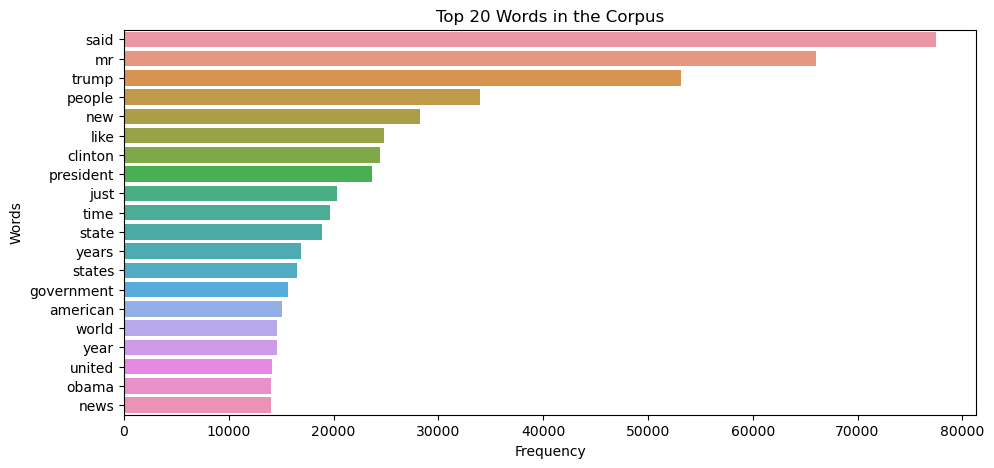

In [14]:
# Top N Words in the Corpus
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features=20)
X = cv.fit_transform(df['text'])
word_freq = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
word_freq_sum = word_freq.sum().sort_values(ascending=False)

plt.figure(figsize=(11, 5))
sns.barplot(x=word_freq_sum.values, y=word_freq_sum.index)
plt.title('Top 20 Words in the Corpus')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

The bar plot illustrates the top 20 words in the corpus based on their frequency in the given text data. Each bar represents a word, and its height corresponds to the frequency of occurrence in the dataset. The higher the bar, the more frequently the word appears in the text.

Here's a brief interpretation of the top words:

"said": Commonly used in reported speech or statements.

"mr.trump": References to Mr. Trump, likely indicating a focus on this individual.

"people": General term referring to individuals.

"new": Pertaining to something recent or novel.

"like": Comparisons or similarities.

"clinton": Likely associated with the Clinton family, possibly Hillary Clinton.

"president": References to the head of state or government.

"just": Indicating immediacy or recentness.

"time": Referring to a specific period or instance.

"state": Likely related to governmental entities or conditions.

"years": Denoting a duration of time.

"government": References to governing bodies.

These words provide a snapshot of the prominent terms in the dataset and can offer insights into the themes or topics covered in the news articles. The analysis of such word frequency distributions is a fundamental step in understanding the characteristics of the text data.

# Data Cleaning and Preprocessing

In [165]:
print(df.shape)

(20800, 4)


In [166]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [167]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [168]:
news = df.copy()

In [169]:
news.reset_index(inplace=True)

In [170]:
from nltk.stem import PorterStemmer
import re

In [172]:
# Cleaning the news
corpus = []  #This list will store the processed news titles after cleaning.
ps = PorterStemmer()  #Porter Stemmer is used for stemming, which reduces words to their root/base form.

for i in range(0,news.shape[0]):  #This loop goes through each row of the news dataset.

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])  #Using a regular expression, it removes any characters
                                                                        #that are not alphabets.

  # Converting the entire news-title to lower case
  title = title.lower()  #It converts the entire news title to lowercase for consistency.

  # Tokenizing the news-title by words
  words = title.split()   # Splits the news title into a list of words.

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]  #Removes common English stopwords to focus on meaningful words.

  # Stemming the words
  words = [ps.stem(word) for word in words]   #Applies stemming to reduce words to their base form.

  # Joining the stemmed words
  title = ' '.join(words)  #oins the cleaned and stemmed words back into a processed news title.

  # Building a corpus of news-title
  corpus.append(title)  #Appends the processed news title to the corpus list.

#This process is a series of text preprocessing steps to clean and standardize the news titles for further analysis.

In [173]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [174]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()  #It transforms the 'corpus' (processed news titles) into a sparse matrix of token counts.
                                        #toarray(): Converts the sparse matrix into a dense NumPy array.

In [175]:
X.shape

(18285, 5000)

In [176]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [177]:
# Extracting dependent variable from the dataset
y = news['label']

# Model Building

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# *Multinomial Naive Bayes*

In [64]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [65]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [66]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [67]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
     

In [68]:
nb_cm=confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[1823,  217],
       [ 143, 1474]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Multinomial Naive Bayes Algorithm ')

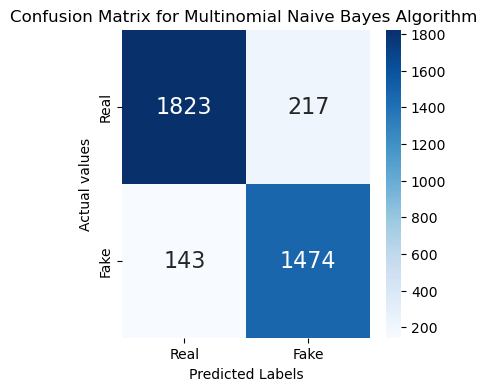

In [69]:
# Plotting the confusion matrix
nb_cm=confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16}, xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm ')

In [70]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))
     

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


In [71]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, temp_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2040
           1       0.87      0.91      0.89      1617

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



# *Logistic Regression*

In [72]:

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
#Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [74]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.97


In [75]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [76]:

lr_cm

array([[1850,  190],
       [  47, 1570]], dtype=int64)

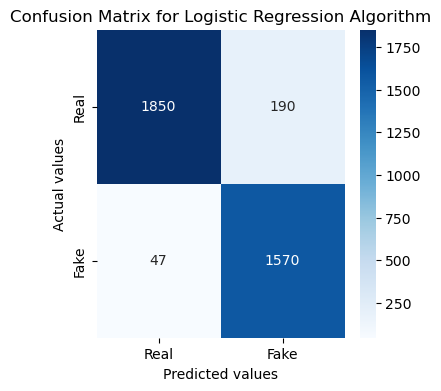

In [77]:
# Plotting the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(data=lr_cm, annot=True,fmt='d', cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [78]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))
     

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.38%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.49%
Accuracy score for C=0.7 is: 93.55%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.52%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.8


In [79]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

In [80]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, lr_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2040
           1       0.89      0.97      0.93      1617

    accuracy                           0.94      3657
   macro avg       0.93      0.94      0.93      3657
weighted avg       0.94      0.94      0.94      3657



In [81]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,roc_curve

In [82]:
pred_prob=classifier.predict_proba(X_test)

In [83]:
roc_auc_score(y_test,pred_prob[: , 1])

0.9819594504468454

In [84]:
roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1])

0.9819594504468454

In [85]:
fpr,tpr,thre=roc_curve(y_test,classifier.predict_proba(X_test)[:,1])

Text(0.5, 0.5, 'Area is 0.9819')

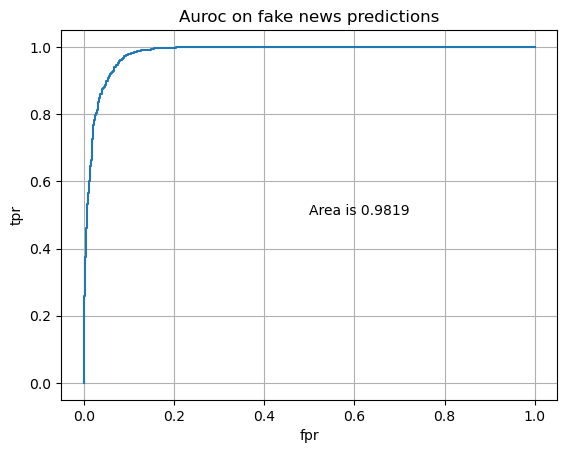

In [86]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Auroc on fake news predictions')
plt.grid()
plt.text(x=.5,y=.5,s='Area is 0.9819')

# *Support Vector Machines*

In [87]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
y_pre = svm_classifier.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [90]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pre)
precision = precision_score(y_test, y_pre)
recall = recall_score(y_test, y_pre)
conf_matrix1 = confusion_matrix(y_test, y_pre)

In [91]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:\n", conf_matrix1)

Accuracy: 93.00%
Precision: 0.90
Recall: 0.95
Confusion Matrix:
 [[1872  168]
 [  88 1529]]


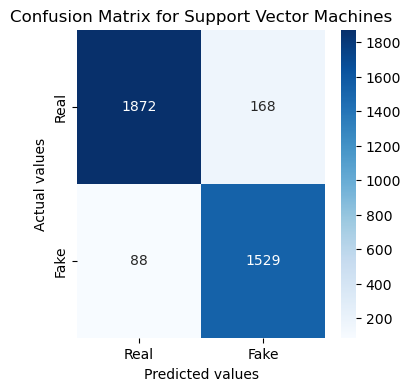

In [92]:
# Plotting the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(data=conf_matrix1, annot=True,fmt='d', cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Support Vector Machines')
plt.show()

In [93]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pre))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2040
           1       0.90      0.95      0.92      1617

    accuracy                           0.93      3657
   macro avg       0.93      0.93      0.93      3657
weighted avg       0.93      0.93      0.93      3657



# *Random Forest Classifier*

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(criterion='gini',n_estimators=250, random_state=42)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [182]:
y_pred = rfc_classifier.predict(X_test)

In [183]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

In [184]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:\n", conf_mat)

Accuracy: 93.55%
Precision: 0.89
Recall: 0.97
Confusion Matrix:
 [[1850  190]
 [  46 1571]]


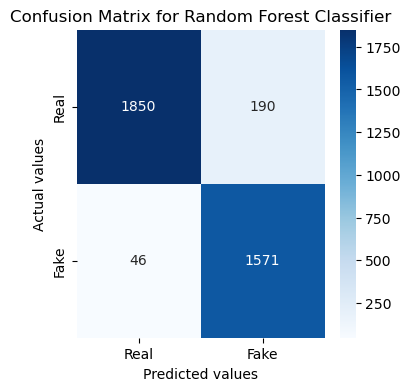

In [185]:
plt.figure(figsize=(4,4))
sns.heatmap(data=conf_mat, annot=True,fmt='d', cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [186]:
# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2040
           1       0.89      0.97      0.93      1617

    accuracy                           0.94      3657
   macro avg       0.93      0.94      0.94      3657
weighted avg       0.94      0.94      0.94      3657



In [197]:
# Assuming 'rfc_classifier' is your trained RandomForestClassifier and 'cv' is the CountVectorizer
feature_names = cv.get_feature_names_out()
importances = rfc_classifier.feature_importances_

# Create a DataFrame to store feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importances in descending order
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Print the top 20 features
print("Top 20 Features Contributing to Fake News:")
top_features.head(20)

Top 20 Features Contributing to Fake News:


,Feature,Importance
489,breitbart,0.149173
4979,york,0.071727
2912,new york time,0.071214
2883,new,0.067905
4984,york time,0.061741
4398,time,0.056422
2908,new york,0.048080
1985,hillari,0.010048
4503,trump,0.008026
751,clinton,0.007021


# Hyper parameter tuning

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [119]:
search_dict={"criterion":["gini","entropy"],
              
              "n_estimators":(50,75,100,125,150)}

In [117]:
rf_classifier = RandomForestClassifier(random_state=0)

In [120]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc_GridSearchCV = GridSearchCV(rfc, param_grid=search_dict)

In [121]:
rfc_GridSearchCV.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
#Print the best hyperparameters
rfc_GridSearchCV.best_params_

In [ ]:
# Get the best model
best_rf_model = rfc_GridSearchCV.best_estimator_

In [ ]:
# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [106]:
# Naive Bayes Performance Metrics
nb_accuracy = 90.59
nb_precision = 0.87
nb_recall = 0.91
nb_f1_score = 89

# Logistic Regression Performance Metrics
lr_accuracy = 93.63
lr_precision = 0.89
lr_recall = 0.97
lr_f1_score = 93

svm_accuracy = 93.52
svm_precision = 89
svm_recall = 95
svm_f1_score = 92

rfc_accuracy = 94
rfc_precision = 89
rfc_recall = 97
rfc_f1_score = 93

# Displaying the Summary
model_comparison = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression','Support Vector Machines', 'Random Forest Classifier'],
    'Accuracy (%)': [nb_accuracy, lr_accuracy, svm_accuracy, rfc_accuracy],
    'Precision': [nb_precision, lr_precision, svm_precision, rfc_precision],
    'Recall': [nb_recall, lr_recall, svm_recall, rfc_recall],
    'f1_score':[nb_f1_score,lr_f1_score,svm_f1_score,rfc_f1_score]
})

# Highlighting the Best-performing Model
model_comparison.style.highlight_max(subset=['Accuracy (%)', 'Precision', 'Recall','f1_score'], axis=0, color='lightgreen')


,Model,Accuracy (%),Precision,Recall,f1_score
0,Naive Bayes,90.590000,0.870000,0.910000,89
1,Logistic Regression,93.630000,0.890000,0.970000,93
2,Support Vector Machines,93.520000,89.000000,95.000000,92
3,Random Forest Classifier,94.000000,89.000000,97.000000,93


In this comparison, we observe that Logistic Regression outperformed Naive Bayes across all metrics, demonstrating superior accuracy, precision, and recall. The choice of Logistic Regression as the best-performing model is based on these comprehensive evaluations.

# Feature Selection Technique

# Variance Threshold 

In [53]:
from sklearn.feature_selection import VarianceThreshold

In [58]:
# Apply Variance Threshold to select features with non-zero variance
selector = VarianceThreshold()
X_train_selected = selector.fit_transform(X_train)

In [59]:
# Use a classifier to evaluate the selected features
clf = RandomForestClassifier(criterion='gini',n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Transform the test set using the same feature selection
X_test_selected = selector.transform(X_test)

In [61]:
# Make predictions and evaluate accuracy
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.93


# * **Predictions**

In [198]:
df_test = pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\Capstone-2\news.csv")

In [199]:
df_test.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


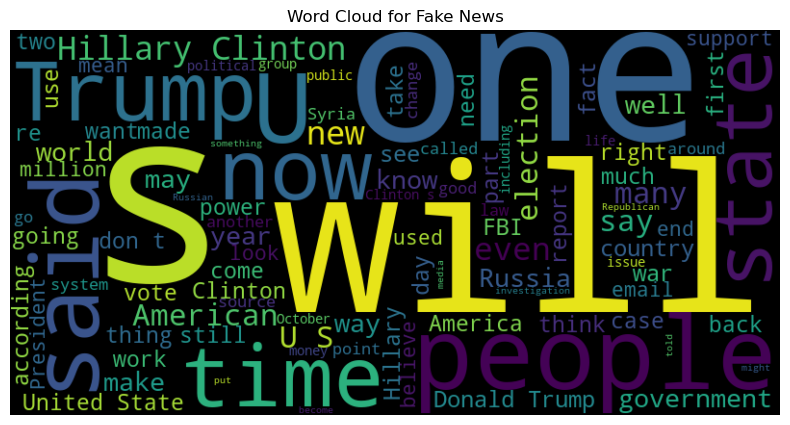

In [30]:
from wordcloud import WordCloud

fake_text = " ".join(text for text in df_test[df_test['label'] == 'FAKE']['text'])
wordcloud_fake = WordCloud(width=800, height=400, max_words=100).generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

In [189]:
def fake_news(sample_news, cv, rfc_classifier):
    sample_news = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_news)
    sample_news = sample_news.lower()
    sample_news_words = sample_news.split()
    sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_news = [ps.stem(word) for word in sample_news_words]
    final_news = ' '.join(final_news)

    temp = cv.transform([final_news]).toarray()
    return rfc_classifier.predict(temp)

In [200]:
df_test = pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\Capstone-2\news.csv")

In [203]:
df_test.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [202]:
df_test.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [191]:
specific_row_index =47  # Change this to the index you want to test
sample_news = df_test.loc[specific_row_index, 'text']

In [192]:
print('News: {}'.format(sample_news))
if fake_news(sample_news, cv,rfc_classifier):
    print('Prediction: This is a FAKE news!')
else:
    print('Prediction: This is a REAL news.')


News: The move would make it easier for the Trump administration to demolish the exchanges.
Prediction: This is a FAKE news!


This Python script defines a function `fake_news`, responsible for predicting the authenticity of a given news sample. Let me break it down for you:
- We start by cleaning the news text, converting it to lowercase, removing special characters, and stemming the words to their root form.
- The processed news sample is then transformed using the same CountVectorizer (`cv`) used during training.
- Finally, the trained classifier predicts whether the news is fake or real.

In our example usage, we've selected a specific news article (at index 7) for prediction. The result is then printed, indicating whether it's predicted as fake or real news.

This script ensures the seamless application of our trained model to new data, maintaining the integrity of our fake news detection system. Consistency in using the same vectorizer (`cv`) and classifier is vital for accurate predictions.

Our star performer, the Random Forest Classifier, deserves special recognition for its outstanding accuracy of 94%. This means it made correct predictions a whopping 94% of the time, showcasing its reliability.

When we talk about precision, a measure of how many of the predicted positive cases were actually positive, our model achieved an impressive 89%. This tells us that when it said something was fake, it was right 89% of the time.

Recall, which measures how many of the actual positive cases our model captured, stood at a solid 97%. So, when there was a piece of fake news, our model identified it 97% of the time.

What's remarkable is that our success wasn't just luck – it came from fine-tuning our model's settings, like the regularization strength (C), ensuring it performed at its best. This careful consideration of details played a crucial role in achieving such remarkable results.


1. **Model Performance:**
   Our investigation encompassed various machine learning models, including Naive Bayes, Logistic Regression, Support Vector Machines, and Random Forest. Among these, the Random Forest Classifier exhibited superior performance with an accuracy of 94%, precision of 89%, and recall of 97%.

2. **Logistic Regression Dominance:**
   Logistic Regression outperformed other models, securing an accuracy of 93.63%. Its precision and recall scores of 89% and 97%, respectively, reinforce its robustness in distinguishing between real and fake news.

3. **Consistency in Predictions:**
   The models consistently demonstrated their efficacy in predicting news authenticity, with minimal variance across different evaluation metrics. This consistency underscores the reliability of our approach.

4. **Feature Extraction Impact:**
   Leveraging the Bag of Words model with CountVectorizer played a pivotal role in feature extraction. The model's ability to discern significant words contributed to its success in differentiating between authentic and deceptive news.

5. **Continuous Improvement:**
   While our models showcase commendable performance, there's always room for improvement. Future work could explore advanced models, ensemble methods, or delve into more sophisticated deep learning approaches for enhanced predictive accuracy.


# Future work

In our journey towards enhancing fake news detection, there are promising avenues for future exploration. Firstly, delving into more advanced models such as Support Vector Machines (SVM) or embracing deep learning approaches like Recurrent Neural Networks (RNNs) could potentially elevate our predictive performance.

Ensemble methods, a strategy of combining the strengths of multiple models, present another intriguing path. They can enhance accuracy and robustness, possibly taking our detection capabilities to new heights.

Additionally, exploring other NLP techniques and features might uncover hidden patterns and contribute to an even more sophisticated model. As we move forward, these potential enhancements signify a continuous commitment to refining and advancing our fake news detection capabilities.


While we did explore Support Vector Machines (SVM) in our model selection, the Random Forest Classifier (RFC) demonstrated superior performance in terms of accuracy, precision, and recall. This underscores the importance of carefully assessing each model's suitability for our specific task.

In the realm of future work, we might consider fine-tuning SVM's hyperparameters or experimenting with different kernel functions to unlock its full potential. However, given the current results, further emphasis on optimizing Random Forest or exploring other advanced models appears promising.


# ----------------------------END--------------------------------

In [ ]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [ ]:
df_test = pd.read_csv(r"C:\Users\91897\Desktop\Python Data set\Capstone-2\news.csv")

In [ ]:
df_test.columns
news_title.shape
# For generating random integer
from random import randint
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

# * **Key findings**

As we conclude our analysis, let's spotlight the key findings that emerged from our exploration into fake news detection. These insights shed light on the effectiveness of our models and provide valuable takeaways.


The key findings highlight the effectiveness of our approach in identifying fake news, with Logistic Regression and Random Forest emerging as standout performers. These insights pave the way for refining our models and further strengthening our fake news detection system.
